# Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1:
Import the boston house dataset from `sklearn.datasets`. Create train and test datasets. Check the data description and familiarize yourself with the data.

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

ImportError: ignored

In [3]:
print(boston.DESCR)

NameError: ignored

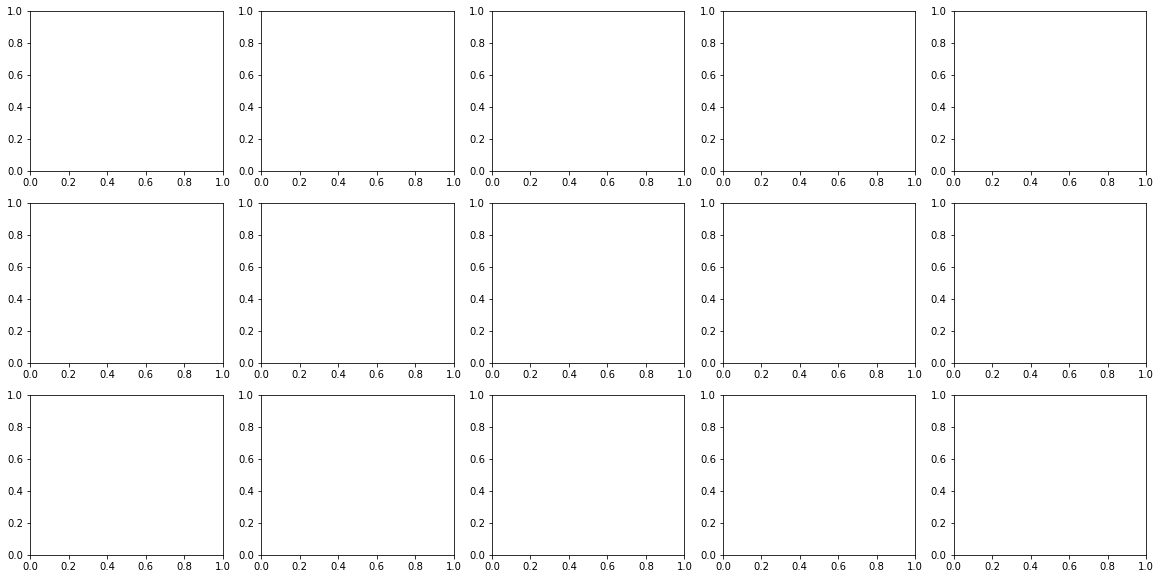

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

In [ ]:
axes.ravel()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9819e8>,
      dtype=object)

In [ ]:
dir(axes[0][0])

### Step 2:
Create a scatter plot of each attribute with the mean house price.

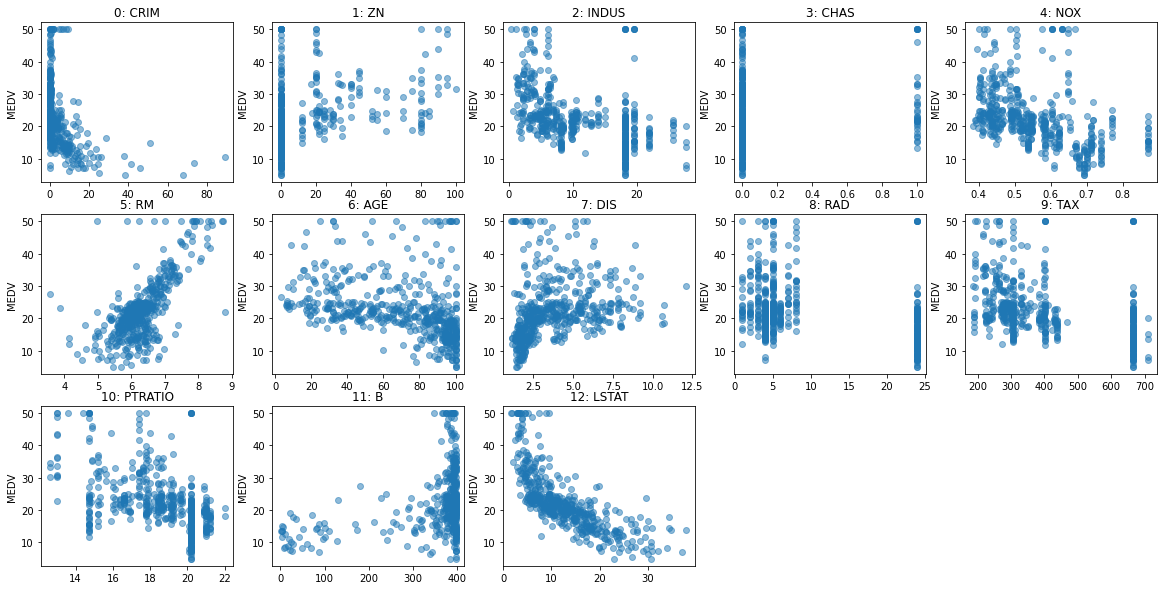

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

### Step 3:
Create a box plot of all attributes.

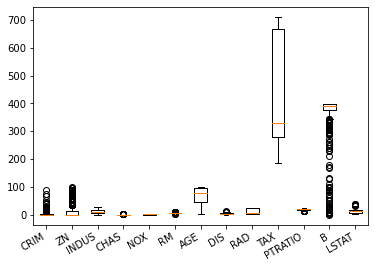

In [ ]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1),
           boston.feature_names, rotation=30, ha="right"); #horizontalalignment or ha

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_train, y_train)

0.7066272660046313

In [ ]:
knr.score(X_test, y_test)

0.4616380924610112

In [ ]:
knr_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
knr_scaled.fit(X_train_scaled, y_train)
knr_scaled.score(X_train_scaled, y_train)

0.849576948978109

In [ ]:
X_test_scaled = scaler.transform(X_test)
knr_scaled.score(X_test_scaled, y_test)

0.606952770711171

### Step 6:
Repeat Step 5 for `RandomForestRegressor`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7952684623500126

In [ ]:
rf_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_test_scaled, y_test)

0.7953897811917161